# 使用sklearn的PCA

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

- 测试使用数据集所有的维度进行训练

In [28]:
digits = load_digits()
X = digits.data
y = digits.target
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [33]:
%%time 
knn_cla = KNeighborsClassifier()
knn_cla.fit(X_train,y_train)
print(knn_cla.score(X_test,y_test))

0.9866666666666667
Wall time: 71.3 ms


- 使用PCA进行降维处理

In [30]:
pca = PCA(0.95)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)
print(pca.explained_variance_ratio_)

[0.14948375 0.13228395 0.11820116 0.08712903 0.05813031 0.04930865
 0.04298284 0.03702522 0.03419742 0.03094562 0.02356912 0.02332942
 0.01794956 0.01752709 0.0144333  0.01418445 0.01346574 0.01254696
 0.00991173 0.00904212 0.00874795 0.00788381 0.00738911 0.00691136
 0.00672545 0.00597661 0.00576894 0.00497407]


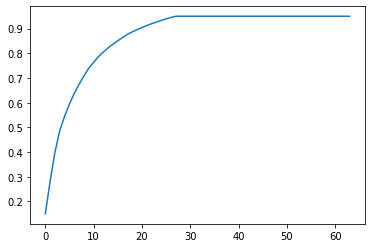

28


In [31]:
plt.plot([i for i in range(X_train.shape[1])], 
         [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1])])
plt.show()
print(pca.n_components_)

In [32]:
%%time 
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_reduction,y_train)
print(knn_pca.score(X_test_reduction,y_test))


0.9866666666666667
Wall time: 41.9 ms
